#### STEP 0: Import nova_grad library

In [2]:
import torch
from torchvision import datasets

import random
import matplotlib.pyplot as plt

import numpy as np

from nova_grad.engine import Scalar
from nova_grad.nn import MultiLayerPerceptron

In [3]:
x_train = datasets.MNIST('./data', train=True, download=True)
x_test = datasets.MNIST('./data', train=False, download=True)

In [4]:
# Implement small batch (NO EFFICIENCY ON MY MACHINE!!)
xs_train = torch.utils.data.Subset(x_train, [x for x in range(10)])
xs_test = torch.utils.data.Subset(x_test, [x for x in range(2)])

In [5]:
# Check train and test data
print(f"We have {len(xs_train)} images in the training set and {len(xs_test)} images in the test set.")

We have 10 images in the training set and 2 images in the test set.


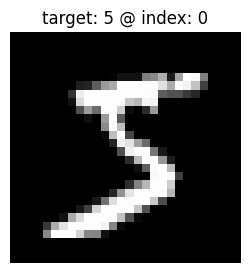

In [6]:
# Visualise images
index = random.randint(0, len(xs_train))
image, target = xs_train[index]

plt.figure(figsize=(3, 3))
plt.imshow(image, cmap="gray")
plt.title("target: {} @ index: {}".format(target, index))
plt.axis(False);

In [7]:
# Load xs (images) and ys (targets) to 1d arrays
xs = [(np.asarray(image).flatten() / 255).tolist() for image, target in xs_train]
    # flatten as currently don't support 2d layers in nn
ys = [np.eye(10, 10, 0)[target].tolist() for image, target in xs_train]

In [8]:
# Convert values to Scalars....
tmp = []
xs_x = []
ys_x = []

for a in xs:
    tmp = []
    for x in a:
        tmp.append(Scalar(x))
    xs_x.append(tmp)

for a in ys:
    tmp = []
    for y in a:
        tmp.append(Scalar(y))
    ys_x.append(tmp)

#xs = [Scalar(x) for a in xs for x in a]
#ys = [Scalar(y) for array in ys for y in a]

In [11]:
# Intialise the NN
n = MultiLayerPerceptron(784, [25, 25, 10])

In [22]:
# Run the training cycles
x = []
y = []

for k in range(25):
    # forward pass
    ypred = [n(x) for x in xs_x]
    loss = 0
    for i in range(0, len(ys)):
        loss += sum([(yout - ygt)**2 for ygt, yout in zip(ys[i], ypred[i])])
    
    # zero grad
    n.zero_grad()
    loss.backward()

    # backward pass
    for p in n.parameters():
        p.data += -0.01 * p.grad

    # capture loss over the cycles
    x.append(k)
    y.append(loss.data)

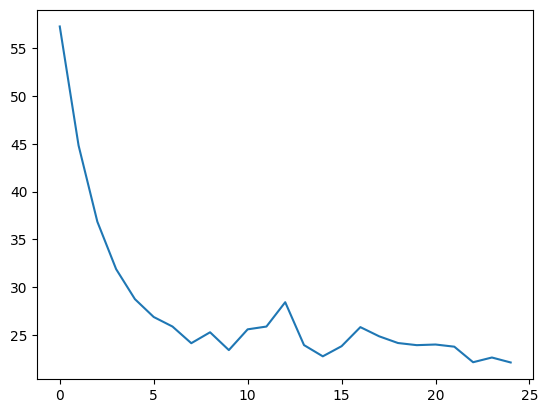

In [23]:
# Visualise the loss function
plt.plot(x, y)

In [25]:
list(zip(ypred[2], ys[2]))

[(Scalar(0.364), 0.0),
 (Scalar(0.531), 0.0),
 (Scalar(-0.471), 0.0),
 (Scalar(-0.518), 0.0),
 (Scalar(0.971), 1.0),
 (Scalar(0.058), 0.0),
 (Scalar(-0.520), 0.0),
 (Scalar(0.560), 0.0),
 (Scalar(-0.513), 0.0),
 (Scalar(-0.081), 0.0)]